In [1]:
# 기본
import numpy as np
from numpy.linalg import inv
from numpy.linalg import solve
import random
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import matplotlib.pyplot as plt
import urllib
import matplotlib.dates as mdates
from matplotlib.dates import bytespdate2num
import matplotlib.ticker as ticker
from matplotlib import font_manager, rc
from matplotlib import style
import itertools
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np
import math
    
import matplotlib.pyplot as plt 
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import make_blobs

import ipywidgets as widgets
from IPython.display import display
from IPython.display import set_matplotlib_formats


# 시계열 데이터 처리
import calendar
import dateutil
from dateutil.parser import parse
import datetime
import statistics

# Network 분석
import networkx as nx

# 지도시각화
import folium
from folium import plugins
import html
import json
import geopy
from geopy.geocoders import Nominatim
import os
import requests
#import ipywidgets
#from IPython.display import Image
#from ipywidgets import interact


import collections
from collections import Counter
#from wordcloud import WordCloud, STOPWORDS as stopwords
#from PIL import Image, ImageFilter
#from wordcloud import ImageColorGenerator

# Network analysis
import networkx as nx
from tqdm import tqdm
import time

# from zeep import Client

from collections import namedtuple
import sqlite3


# 한 번에 matplotlib 그림 띄우기
%matplotlib inline    
%config InlineBackend.figure_format = 'retina'  #%matplotlib 뒤에 써주면 그래프를 더 높은 해상도로 보여줌

# 설정 관련
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [8]:
pck_original = pd.read_csv'data/(Main)2019이후_3회_이상_주문한_사람들.csv', encoding='euc-kr')

In [12]:
pck_original_dropdup = pck_original.drop_duplicates(['주문일시'])

In [5]:
pck_4 = pd.read_csv('data/parent_df (1462명).csv', encoding='euc-kr')

In [9]:
pck_original.shape

(33204, 53)

In [10]:
pck_original

,주문번호,주문자ID,주문경로(PC/모바일),결제수단,총 결제금액,주문상품명,상품번호,주문횟수,상품명(패커스(PACKUS)),수량,분류,세부분류,사이즈,색상,개수,공급사,자체상품코드,주문일시,결제일시(입금확인일),발주일,배송대기일,배송시작일,배송완료일,세금구분,공급원가,상품 매입가,판매가,상품구매금액,상품별 추가할인 상세,옵션+판매가,쿠폰 할인금액,주문자 가입일,특별관리회원,회원추가항목_가입경로,회원추가항목_업종,주문 시 회원등급,주문자 주소,수령인 주소,위도,경도,주문-배송완료,발주일-배송시작일,배송시작-배송완료,회원가입연도,회원가입월,회원가입일,가장최근주문,19년이후 누적주문횟수,가입기간(일수),누적주문,주문연도.월,총주문량,세부분류사이즈
0,20170323-0000017,xigol80,PC,"쿠폰,카드",169500,"70파이 다용도컵 세트 1호 소 70ml 백색 PS 3,000개 1set(2박스)",38,477.0,"70파이 다용도컵 세트 1호 소 70ml 백색 PS 3,000개 1set(2박스)",1,30.0,다용도컵,70ml,백색,6000.0,패커스,P00000BL,2017-03-23 03:09:18.000,2017-03-23 03:09:18.000,2017-03-23 03:09:18.000,2017-03-23 10:32:06.096,2017-03-23 18:43:40.000,2017-04-01 19:49:03.000,과세상품,42900.0,40500,53100,53100.0,NaN,53100.0,2000.0,2017-03-08 00:00:00.000,NaN,NaN,NaN,사업자,서울특별시 영등포구 여의도동,서울특별시 영등포구 여의도동,37.517540,126.934531,9 days 16:39:45.000000000,0 days 15:34:22.000000000,9 days 01:05:23.000000000,2017,3,3,2019-05-03 04:09:24.000,51.0,1004,22.0,2017_3,6000.0,다용도컵_70ml
1,20170323-0000017,xigol80,PC,"쿠폰,카드",169500,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",42,471.0,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",2,30.0,다용도컵,200ml,백색,2000.0,패커스,P00000BP,2017-03-23 03:09:18.000,2017-03-23 03:09:18.000,2017-03-23 03:09:18.000,2017-03-23 10:33:14.195,2017-03-23 18:43:40.000,2017-04-01 19:49:03.000,과세상품,44000.0,43000,59200,118400.0,NaN,59200.0,2000.0,2017-03-08 00:00:00.000,NaN,NaN,NaN,사업자,서울특별시 영등포구 여의도동,서울특별시 영등포구 여의도동,37.517540,126.934531,9 days 16:39:45.000000000,0 days 15:34:22.000000000,9 days 01:05:23.000000000,2017,3,3,2019-05-03 04:09:24.000,51.0,1004,22.0,2017_3,4000.0,다용도컵_200ml
2,20170421-0000015,xigol80,PC,"쿠폰,카드",113400,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",42,471.0,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",2,30.0,다용도컵,200ml,백색,2000.0,패커스,P00000BP,2017-04-21 03:38:14.000,2017-04-21 03:38:14.000,2017-04-21 03:38:14.000,2017-04-21 17:05:22.809,2017-04-21 17:10:58.000,2017-04-25 08:23:56.000,과세상품,44000.0,43000,59200,118400.0,NaN,59200.0,5000.0,2017-03-08 00:00:00.000,NaN,NaN,NaN,사업자,서울특별시 영등포구 여의도동,서울특별시 영등포구 여의도동,37.517540,126.934531,4 days 04:45:42.000000000,0 days 13:32:44.000000000,3 days 15:12:58.000000000,2017,3,3,2019-05-03 04:09:24.000,51.0,1004,22.0,2017_4,4000.0,다용도컵_200ml
3,20170519-0000012,xigol80,PC,"쿠폰,카드",208590,"70파이 다용도컵 세트 1호 특소 50ml 백색 PS 3,000개 1set(2박스)",47,274.0,"70파이 다용도컵 세트 1호 특소 50ml 백색 PS 3,000개 1set(2박스)",1,30.0,다용도컵,50ml,백색,6000.0,패커스,P00000BU,2017-05-19 05:59:27.000,2017-05-19 05:59:27.000,2017-05-19 05:59:27.000,2017-05-19 16:01:20.590,2017-05-19 19:50:23.000,2017-05-27 05:35:19.000,과세상품,41250.0,40500,53100,53100.0,다용도 10%할인,53100.0,3000.0,2017-03-08 00:00:00.000,NaN,NaN,NaN,사업자,서울특별시 영등포구 여의도동,서울특별시 영등포구 여의도동,37.517540,126.934531,7 days 23:35:52.000000000,0 days 13:50:56.000000000,7 days 09:44:56.000000000,2017,3,3,2019-05-03 04:09:24.000,51.0,1004,22.0,2017_5,6000.0,다용도컵_50ml
4,20170519-0000012,xigol80,PC,"쿠폰,카드",208590,"70파이 다용도컵 세트 2호 대 80ml 백색 PS 3,000개 1set(2박스)",39,94.0,"70파이 다용도컵 세트 2호 대 80ml 백색 PS 3,000개 1set(2박스)",1,30.0,다용도컵,80ml,백색,6000.0,패커스,P00000BM,2017-05-19 05:59:27.000,2017-05-19 05:59:27.000,2017-05-19 05:59:27.000,2017-05-19 16:01:20.590,2017-05-19 19:50:23.000,2017-05-27 05:35:19.000,과세상품,49500.0,45000,63600,63600.0,다용도 10%할인,63600.0,3000.0,2017-03-08 00:00:00.000,NaN,NaN,NaN,사업자,서울특별시 영등포구 여의도동,서울특별시 영등포구 여의도동,37.517540,126.934531,7 days 23:35:52.000000000,0 days 13:50:56.000000000,7 days 09:44:56.000000000,2017,3,3,2019-05-03 04:09:24.000,51.0,1004,22.0,2017_5,6000.0,다용도컵_80ml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33199,1908301422425566,q9691445,NaN,무통장 입금,54850,195파이 탕용기 소 300개 1set(2박스),1077,1366.0,195파이 탕용기 소 300개 1set(2박스),1,1.0,탕용기,195_小,NaN,600.0,패커스,P0000BPK,2019-08-30 14:22:42.000,2019-09-02 09:03:36.000,NaN,NaN,NaN,NaN,NaN,NaN,44550,57850,NaN,NaN,NaN,Na

In [6]:
pck_4.head()

,주문자ID,평균 주문금액(median),평균주문금액(mean),평균구매주기,같이 사는 품목,전화주문고객,감자탕용기_2200ml,감자탕용기_2700ml,감자탕용기_3200ml,고강도미니탕용기_미니,고무장갑,군만두용기_1칸,냄비_2750ml,냄비뚜껑_大,냉면용기_中,냉면용기_大,다용도컵_150ml,다용도컵_165ml,다용도컵_200ml,다용도컵_250ml,다용도컵_270ml,다용도컵_300ml,다용도컵_370ml,다용도컵_400ml,다용도컵_50ml,다용도컵_600ml,다용도컵_70ml,다용도컵_80ml,단무지,도시락용기(돈까스)_5칸,도시락용기(돈까스)_中,도시락용기_4칸 A,도시락용기_4칸 B,도시락용기_5칸,도시락용기_6칸 02,도시락용기_6칸 L1,도시락용기_7칸,도시락용기_8칸,랩칼,미니탕용기_미니,반찬용기_104_1칸,반찬용기_105_1칸,반찬용기_201_1칸,반찬용기_202-2_2칸,반찬용기_202_1칸,반찬용기_203_1칸,반찬용기_204_1칸,반찬용기_211_1칸,반찬용기_D-363,반찬용기_D-364_4칸,반찬용기_D-365_5칸,비닐봉투(맛난거)_中,비닐봉투(맛난거)_大,비닐봉투(맛난거)_小,비닐봉투(맛난거)_특大,비닐봉투(무지)_中,비닐봉투(무지)_大,비닐봉투(무지)_小,비닐봉투(무지)_특大,비닐봉투(배달중)_中,비닐봉투(배달중)_大,비닐봉투(배달중)_小,비닐봉투(배달중)_특大,사각찬용기_4칸,샐러드_1칸(550ml),샐러드_3칸(150ml),샐러드_4칸(100ml),수세미,실링기계,실링용기_1000ml,실링용기_1150ml,실링용기_1350ml,실링용기_1500ml,실링용기_2000ml,실링용기_200ml,실링용기_2200ml,실링용기_230ml,실링용기_3-5A,실링용기_400ml,실링용기_500ml,실링용기_5칸,실링용기_600ml,실링용기_650ml,실링용기_700ml,실링용기_84-2A,실링용기_900ml,실링필름_150mm x 200 m,실링필름_160mm x 200m,실링필름_190mm x 200m,실링필름_200mm x 200m,실링필름_245mm x 200m,아이스컵 뚜껑_돔형_구멍,아이스컵 뚜껑_돔형_노구멍,아이스컵 뚜껑_평형_민자형_십자구멍,아이스컵_12ounce,아이스컵_14ounce,아이스컵_16ounce,아이스컵_24ounce,아이스컵_돔형_구멍,우동용기_中,우동용기_大,우동용기_특大,원형용기_150ml,원형용기_350ml,원형용기_450ml,원형용기_470ml,원형용기_大,원형접시_大,원형접시_小,원형접시_미니,위생랩_2호,위생롤백_2호,위생롤백_5호,위생장갑,일회용 숟가락,일회용 젓가락_198mm,일회용 포크_160mm,종이호일_1호,종이호일_2호,죽용기_1050ml,죽용기_1150ml,죽용기_400ml,죽용기_550ml,죽용기_750ml,죽용기_920ml,중식소스용기,중화면용기 뚜껑,중화면용기_中,중화면용기_大,중화면용기_小,지퍼백_M,짬짜면_2칸,찜용기(사각)_2000ml,찜용기(사각)_2500ml,찜용기(사각)_3200ml,찜용기(원)_2500ml,찜용기(원)_3500ml,찜용기(원)_4000ml,찜용기(원)_4500ml,찜용기(타원)_1800ml,찜용기(타원)_2500ml,찜용기(타원)_3000ml,찬용기_250ml,찬용기_350ml,찬용기_450ml,타원접시,탕용기_195_大,탕용기_195_小,탕용기_210_大,탕용기_210_小,탕용기_225_1800ml,탕용기_225_2400ml,탕용기_225_3000ml,탕용기_240_5000ml,탕용기_270_6500ml,행주
0,xigol80,121440.0,144826.818182,37,['다용도컵'],0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.18,0.0,0.0,0.0,0.00,0.0,70.38,0,0.0,53.97,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1.20,1.3,0.0,0.0,0,0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,kyen1311,91620.0,89502.857143,75,['죽용기'],0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.00,0.0,0.0,0.0,0,0,0.0,0.0,0.0,7.99,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,85643404@n,75820.0,73318.536585,14,"['위생장갑', '샐러드']",0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.14,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,3.55,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,ywca897,174080.0,182370.909091,64,"['다용도컵', '죽용기']",0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,20.62,0.0,0.00,0,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [7]:
pck_4.shape

(1462, 156)

# columns 추가하기: 전체결제금액

In [11]:
pck_original

,주문번호,주문자ID,주문경로(PC/모바일),결제수단,총 결제금액,주문상품명,상품번호,주문횟수,상품명(패커스(PACKUS)),수량,분류,세부분류,사이즈,색상,개수,공급사,자체상품코드,주문일시,결제일시(입금확인일),발주일,배송대기일,배송시작일,배송완료일,세금구분,공급원가,상품 매입가,판매가,상품구매금액,상품별 추가할인 상세,옵션+판매가,쿠폰 할인금액,주문자 가입일,특별관리회원,회원추가항목_가입경로,회원추가항목_업종,주문 시 회원등급,주문자 주소,수령인 주소,위도,경도,주문-배송완료,발주일-배송시작일,배송시작-배송완료,회원가입연도,회원가입월,회원가입일,가장최근주문,19년이후 누적주문횟수,가입기간(일수),누적주문,주문연도.월,총주문량,세부분류사이즈
0,20170323-0000017,xigol80,PC,"쿠폰,카드",169500,"70파이 다용도컵 세트 1호 소 70ml 백색 PS 3,000개 1set(2박스)",38,477.0,"70파이 다용도컵 세트 1호 소 70ml 백색 PS 3,000개 1set(2박스)",1,30.0,다용도컵,70ml,백색,6000.0,패커스,P00000BL,2017-03-23 03:09:18.000,2017-03-23 03:09:18.000,2017-03-23 03:09:18.000,2017-03-23 10:32:06.096,2017-03-23 18:43:40.000,2017-04-01 19:49:03.000,과세상품,42900.0,40500,53100,53100.0,NaN,53100.0,2000.0,2017-03-08 00:00:00.000,NaN,NaN,NaN,사업자,서울특별시 영등포구 여의도동,서울특별시 영등포구 여의도동,37.517540,126.934531,9 days 16:39:45.000000000,0 days 15:34:22.000000000,9 days 01:05:23.000000000,2017,3,3,2019-05-03 04:09:24.000,51.0,1004,22.0,2017_3,6000.0,다용도컵_70ml
1,20170323-0000017,xigol80,PC,"쿠폰,카드",169500,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",42,471.0,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",2,30.0,다용도컵,200ml,백색,2000.0,패커스,P00000BP,2017-03-23 03:09:18.000,2017-03-23 03:09:18.000,2017-03-23 03:09:18.000,2017-03-23 10:33:14.195,2017-03-23 18:43:40.000,2017-04-01 19:49:03.000,과세상품,44000.0,43000,59200,118400.0,NaN,59200.0,2000.0,2017-03-08 00:00:00.000,NaN,NaN,NaN,사업자,서울특별시 영등포구 여의도동,서울특별시 영등포구 여의도동,37.517540,126.934531,9 days 16:39:45.000000000,0 days 15:34:22.000000000,9 days 01:05:23.000000000,2017,3,3,2019-05-03 04:09:24.000,51.0,1004,22.0,2017_3,4000.0,다용도컵_200ml
2,20170421-0000015,xigol80,PC,"쿠폰,카드",113400,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",42,471.0,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",2,30.0,다용도컵,200ml,백색,2000.0,패커스,P00000BP,2017-04-21 03:38:14.000,2017-04-21 03:38:14.000,2017-04-21 03:38:14.000,2017-04-21 17:05:22.809,2017-04-21 17:10:58.000,2017-04-25 08:23:56.000,과세상품,44000.0,43000,59200,118400.0,NaN,59200.0,5000.0,2017-03-08 00:00:00.000,NaN,NaN,NaN,사업자,서울특별시 영등포구 여의도동,서울특별시 영등포구 여의도동,37.517540,126.934531,4 days 04:45:42.000000000,0 days 13:32:44.000000000,3 days 15:12:58.000000000,2017,3,3,2019-05-03 04:09:24.000,51.0,1004,22.0,2017_4,4000.0,다용도컵_200ml
3,20170519-0000012,xigol80,PC,"쿠폰,카드",208590,"70파이 다용도컵 세트 1호 특소 50ml 백색 PS 3,000개 1set(2박스)",47,274.0,"70파이 다용도컵 세트 1호 특소 50ml 백색 PS 3,000개 1set(2박스)",1,30.0,다용도컵,50ml,백색,6000.0,패커스,P00000BU,2017-05-19 05:59:27.000,2017-05-19 05:59:27.000,2017-05-19 05:59:27.000,2017-05-19 16:01:20.590,2017-05-19 19:50:23.000,2017-05-27 05:35:19.000,과세상품,41250.0,40500,53100,53100.0,다용도 10%할인,53100.0,3000.0,2017-03-08 00:00:00.000,NaN,NaN,NaN,사업자,서울특별시 영등포구 여의도동,서울특별시 영등포구 여의도동,37.517540,126.934531,7 days 23:35:52.000000000,0 days 13:50:56.000000000,7 days 09:44:56.000000000,2017,3,3,2019-05-03 04:09:24.000,51.0,1004,22.0,2017_5,6000.0,다용도컵_50ml
4,20170519-0000012,xigol80,PC,"쿠폰,카드",208590,"70파이 다용도컵 세트 2호 대 80ml 백색 PS 3,000개 1set(2박스)",39,94.0,"70파이 다용도컵 세트 2호 대 80ml 백색 PS 3,000개 1set(2박스)",1,30.0,다용도컵,80ml,백색,6000.0,패커스,P00000BM,2017-05-19 05:59:27.000,2017-05-19 05:59:27.000,2017-05-19 05:59:27.000,2017-05-19 16:01:20.590,2017-05-19 19:50:23.000,2017-05-27 05:35:19.000,과세상품,49500.0,45000,63600,63600.0,다용도 10%할인,63600.0,3000.0,2017-03-08 00:00:00.000,NaN,NaN,NaN,사업자,서울특별시 영등포구 여의도동,서울특별시 영등포구 여의도동,37.517540,126.934531,7 days 23:35:52.000000000,0 days 13:50:56.000000000,7 days 09:44:56.000000000,2017,3,3,2019-05-03 04:09:24.000,51.0,1004,22.0,2017_5,6000.0,다용도컵_80ml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33199,1908301422425566,q9691445,NaN,무통장 입금,54850,195파이 탕용기 소 300개 1set(2박스),1077,1366.0,195파이 탕용기 소 300개 1set(2박스),1,1.0,탕용기,195_小,NaN,600.0,패커스,P0000BPK,2019-08-30 14:22:42.000,2019-09-02 09:03:36.000,NaN,NaN,NaN,NaN,NaN,NaN,44550,57850,NaN,NaN,NaN,Na

In [14]:
list_cst_ids = []
list_total_expenditure = []
for customer_id in tqdm(list(pck_original_dropdup['주문자ID'].unique())):
    temp = pck_original_dropdup[pck_original_dropdup['주문자ID']==customer_id]
    total_expenditure = temp['총 결제금액'].sum()
    list_cst_ids.append(customer_id)
    list_total_expenditure.append(total_expenditure)

100%|█████████████████████████████████████████████████████████████████████████████| 1462/1462 [00:06<00:00, 221.63it/s]


In [15]:
dict_id_total_expenditure = dict(zip(list_cst_ids,list_total_expenditure))

# columns 추가하기: 누적주문횟수

In [24]:
list_cst_ids = pck_original[['주문자ID','19년이후 누적주문횟수']].drop_duplicates(['주문자ID'])['주문자ID'].tolist()
list_누적주문횟수 = pck_original[['주문자ID','19년이후 누적주문횟수']].drop_duplicates(['주문자ID'])['19년이후 누적주문횟수'].tolist()
dict_cst_누적주문횟수 = dict(zip(list_cst_ids,list_누적주문횟수))

# dataframe 만들기

In [18]:
df_clustering_pre = pck_4[['주문자ID', '평균 주문금액(median)', '평균구매주기','전화주문고객']]

In [25]:
df_clustering_pre

,주문자ID,평균 주문금액(median),평균구매주기,전화주문고객
0,xigol80,121440.0,37,0.0
1,kyen1311,91620.0,75,0.0
2,85643404@n,75820.0,14,0.0
3,ywca897,174080.0,64,0.0
4,pinkbabi100,94100.0,39,0.0
...,...,...,...,...
1457,clcc,91270.0,58,0.0
1458,pp1664,78335.0,5,0.0
1459,90873546@n,76745.0,5,0.0
1460,104005455@n,82250.0,1,0.0


In [26]:
df_clustering_pre['누적결제금액'] = df_clustering_pre['주문자ID'].map(dict_id_total_expenditure)
df_clustering_pre['19이후_누적주문횟수'] = df_clustering_pre['주문자ID'].map(dict_cst_누적주문횟수)

In [27]:
df_clustering_pre

,주문자ID,평균 주문금액(median),평균구매주기,전화주문고객,누적결제금액,19이후_누적주문횟수
0,xigol80,121440.0,37,0.0,3186190,51.0
1,kyen1311,91620.0,75,0.0,626520,8.0
2,85643404@n,75820.0,14,0.0,3006060,65.0
3,ywca897,174080.0,64,0.0,2006080,23.0
4,pinkbabi100,94100.0,39,0.0,1851270,30.0
...,...,...,...,...,...,...
1457,clcc,91270.0,58,0.0,338450,4.0
1458,pp1664,78335.0,5,0.0,362890,5.0
1459,90873546@n,76745.0,5,0.0,560040,7.0
1460,104005455@n,82250.0,1,0.0,374870,9.0


# Clustering 시작

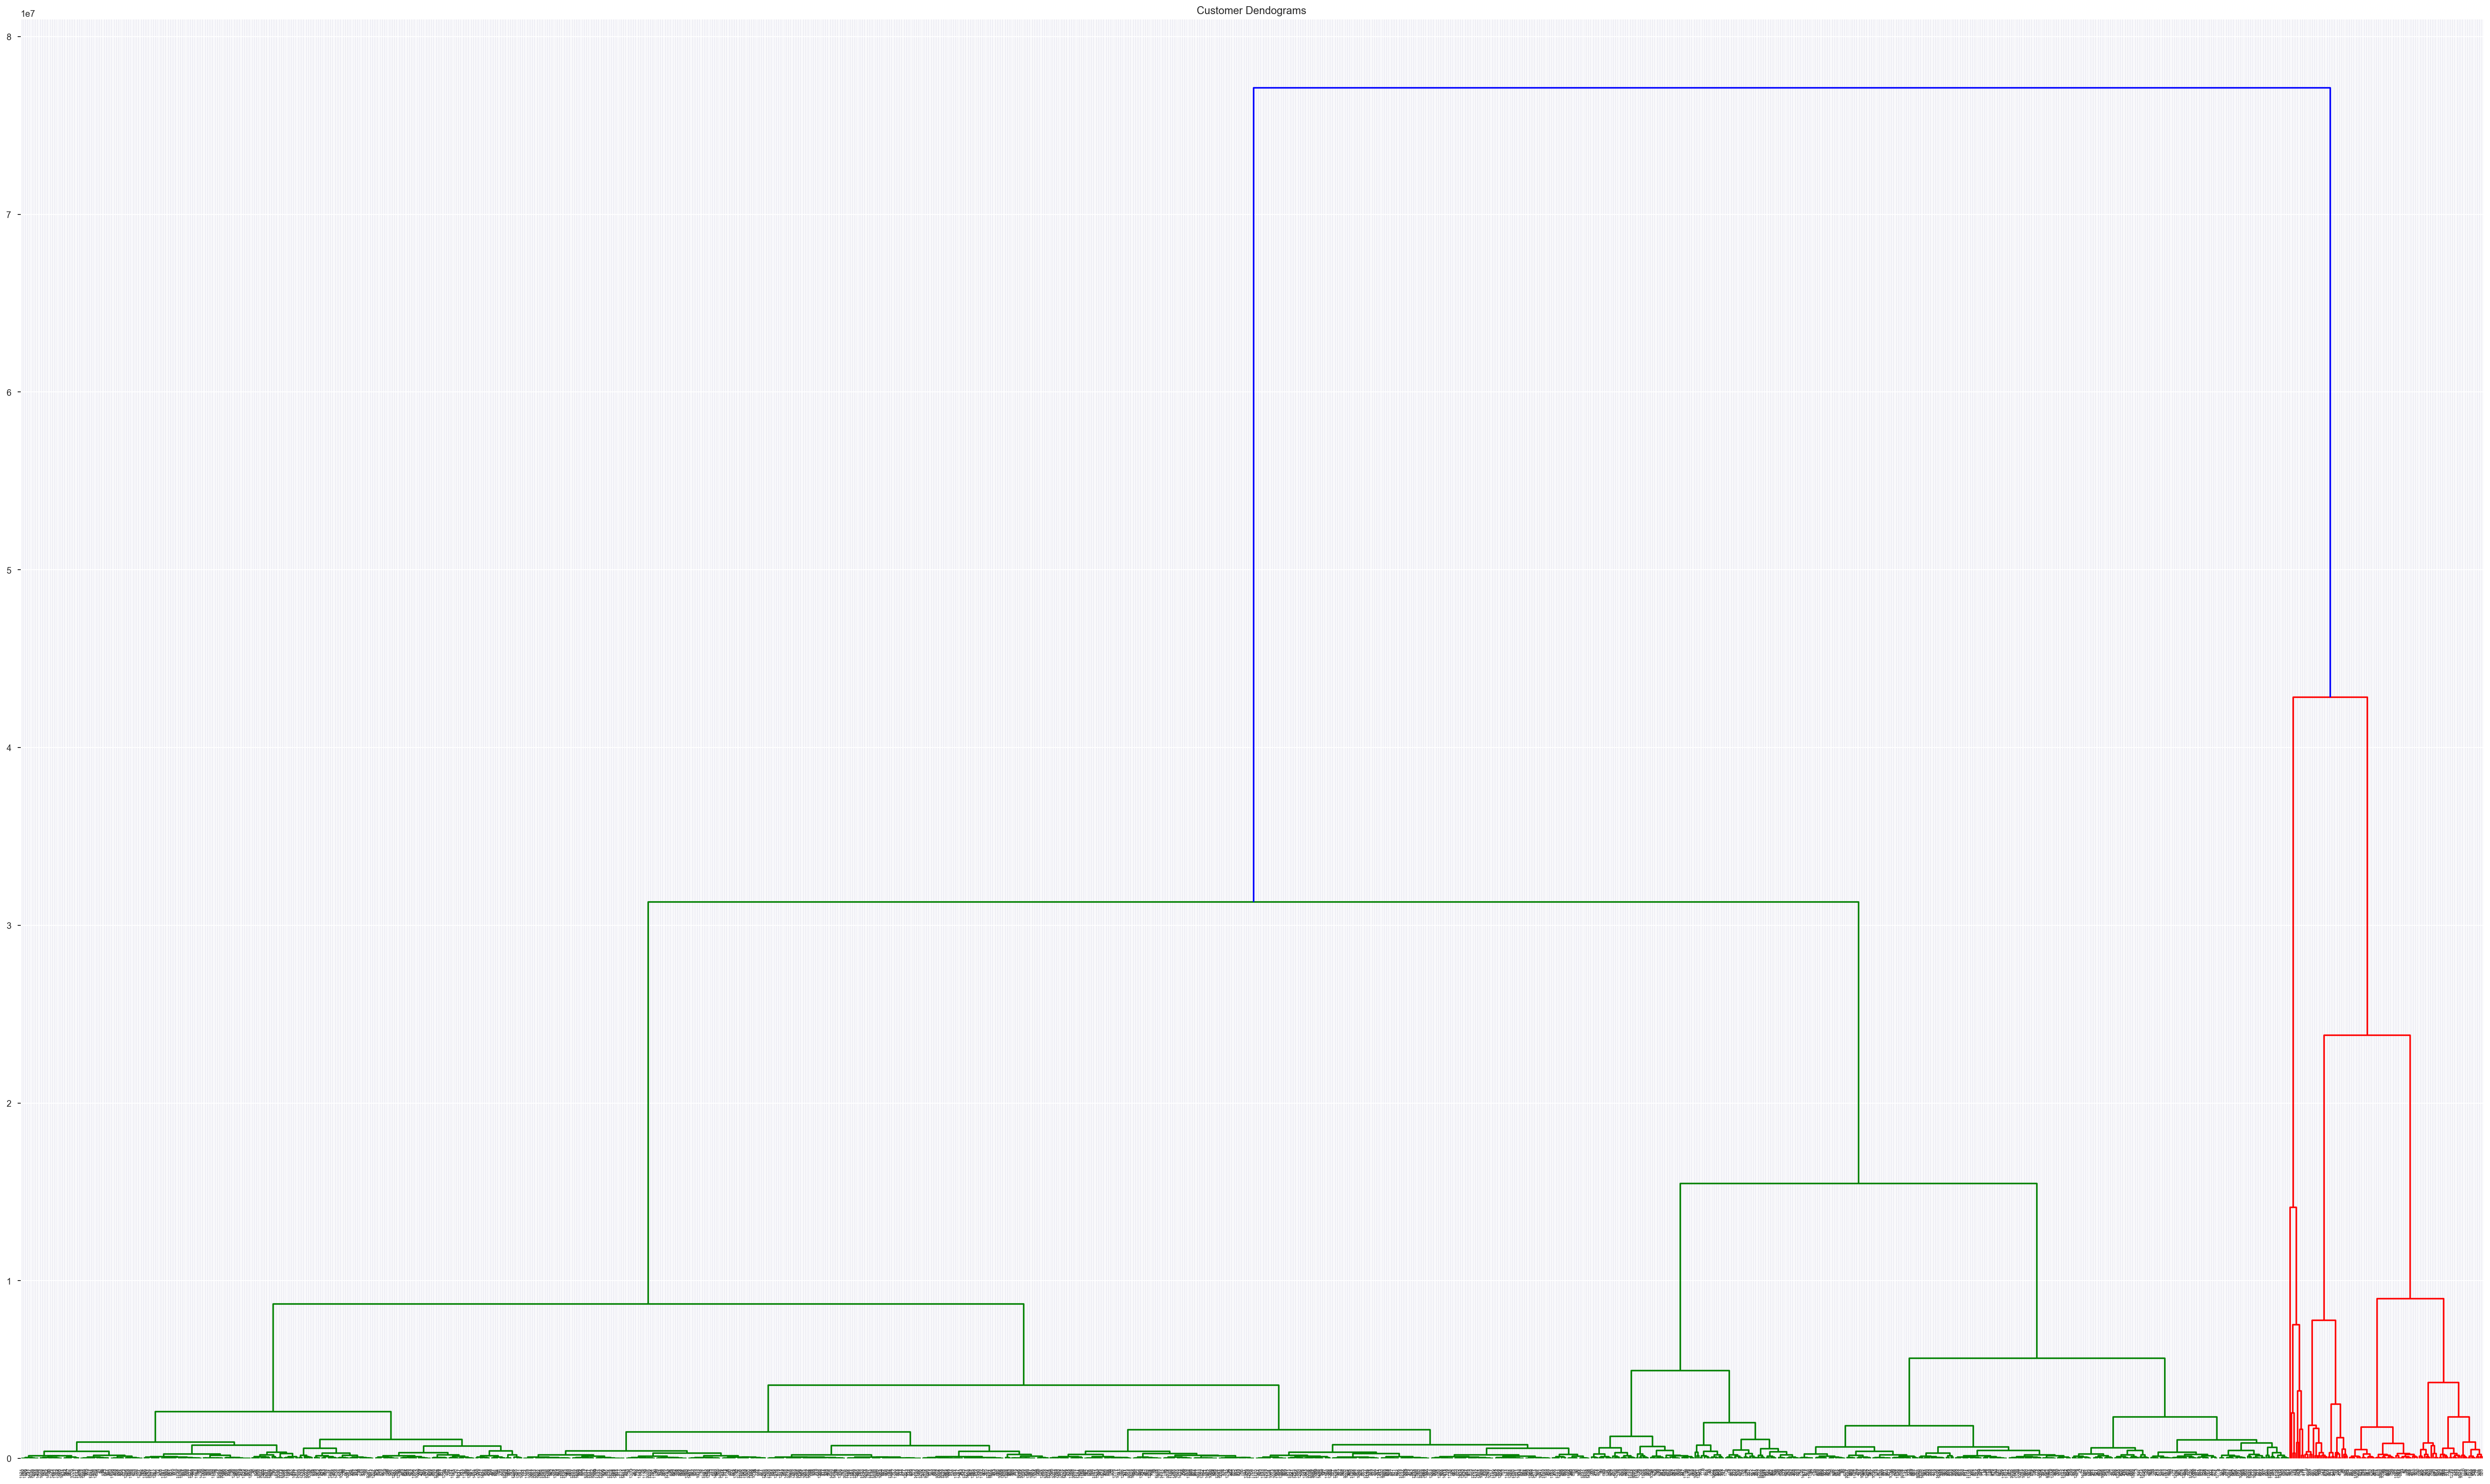

In [28]:
# Dendrogram부터 뽑아보기
import scipy.cluster.hierarchy as shc
data = df_clustering_pre.iloc[:, 1:].values

plt.figure(figsize=(50, 30))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [30]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4, random_state=0)

model.fit(data)

y_predict = model.fit_predict(data)

df_clustering_pre['군집_4'] = y_predict

In [32]:
df_clustered = df_clustering_pre.copy()

In [33]:
df_clustered

,주문자ID,평균 주문금액(median),평균구매주기,전화주문고객,누적결제금액,19이후_누적주문횟수,군집_5,군집_4
0,xigol80,121440.0,37,0.0,3186190,51.0,1,2
1,kyen1311,91620.0,75,0.0,626520,8.0,0,0
2,85643404@n,75820.0,14,0.0,3006060,65.0,1,2
3,ywca897,174080.0,64,0.0,2006080,23.0,3,2
4,pinkbabi100,94100.0,39,0.0,1851270,30.0,3,2
...,...,...,...,...,...,...,...,...
1457,clcc,91270.0,58,0.0,338450,4.0,0,0
1458,pp1664,78335.0,5,0.0,362890,5.0,0,0
1459,90873546@n,76745.0,5,0.0,560040,7.0,0,0
1460,104005455@n,82250.0,1,0.0,374870,9.0,0,0


## 군집별 특성파악

In [34]:
df_clustered.columns

Index(['주문자ID', '평균 주문금액(median)', '평균구매주기', '전화주문고객', '누적결제금액', '19이후_누적주문횟수',
       '군집_5', '군집_4'],
      dtype='object')

In [38]:
df_clustered['군집_4'].value_counts()

0    1150
2     250
1      54
3       8
Name: 군집_4, dtype: int64

In [37]:
df_clustered['군집_5'].value_counts()

0    978
3    341
1    107
4     29
2      7
Name: 군집_5, dtype: int64

In [ ]:
data['전화주문고객'] = data['주문자ID'].str[:2] == 'pp'
data['전화주문고객'] = data['전화주문고객'].replace(True,1)
data['전화주문고객'] = data['전화주문고객'].replace(False,0)

In [ ]:
data.groupby('군집_5')[['전화주문고객']].sum()

In [36]:
df_clustered.groupby('군집_5')[['평균 주문금액(median)', '평균구매주기', '전화주문고객', '누적결제금액', '19이후_누적주문횟수']].mean()

,평균 주문금액(median),평균구매주기,전화주문고객,누적결제금액,19이후_누적주문횟수
군집_5,,,,,
0,91856.762781,47.880368,0.0,5.384511e+05,10.630879
1,153406.121495,11.990654,0.0,4.097961e+06,64.168224
2,222106.928571,5.714286,0.0,1.707210e+07,227.714286
3,128807.862170,20.914956,0.0,1.798303e+06,32.469208
4,248921.034483,10.068966,0.0,8.428850e+06,112.931034


In [39]:
df_clustered

,주문자ID,평균 주문금액(median),평균구매주기,전화주문고객,누적결제금액,19이후_누적주문횟수,군집_5,군집_4
0,xigol80,121440.0,37,0.0,3186190,51.0,1,2
1,kyen1311,91620.0,75,0.0,626520,8.0,0,0
2,85643404@n,75820.0,14,0.0,3006060,65.0,1,2
3,ywca897,174080.0,64,0.0,2006080,23.0,3,2
4,pinkbabi100,94100.0,39,0.0,1851270,30.0,3,2
...,...,...,...,...,...,...,...,...
1457,clcc,91270.0,58,0.0,338450,4.0,0,0
1458,pp1664,78335.0,5,0.0,362890,5.0,0,0
1459,90873546@n,76745.0,5,0.0,560040,7.0,0,0
1460,104005455@n,82250.0,1,0.0,374870,9.0,0,0


In [40]:
df_clustered.to_csv('clustering완료.csv', index=False, encoding='euc-kr')